
# Project: Investigate a No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.

* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient isenrolled in Brasilian welfare program Bolsa Família.


We need to investigate What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# this cell to import statements for all of the packages that will be used.

import time
import pandas as pd
%matplotlib inline
import numpy as np

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [75]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('No_show_appointment.csv')

In [3]:
#display the first few rows.
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#number of coloums&rows
df.shape

(110527, 14)

In [5]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
#describe the dataframe
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [7]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# this returns useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

#### Converting columns that has date to a datetime datatype

In [11]:
 # convert the Start Time column to datetime
df['Scheduled_Date'] = pd.to_datetime(df['ScheduledDay'])
# convert the Start Time column to datetime
df['Appointment_Date'] = pd.to_datetime(df['AppointmentDay'])

#### Extract month and day of week from date coloums for more analysis

In [12]:
#extract month and day of week from Appointment_day and Scheduled_day to create new columns
df['Scheduled_month'] = df['Scheduled_Date'].dt.month        
df['Scheduled_Weekday'] = df['Scheduled_Date'].dt.strftime("%A")
df['Appointment_month'] = df['Appointment_Date'].dt.month        
df['Appointment_Weekday'] = df['Appointment_Date'].dt.strftime("%A")

In [13]:
#display the first few rows.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Appointment_Date,Scheduled_month,Scheduled_Weekday,Appointment_month,Appointment_Weekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,4,Friday,4,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,4,Friday,4,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,4,Friday,4,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,4,Friday,4,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,4,Friday,4,Friday


In [14]:
# check for duplicates in the data
sum(df.duplicated())

0

In [15]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [16]:
# as shown their are negative value in age and this doesnt make sense so it will be replaced with mean age 
meanAge = df['Age'].mean()
df[df['Age'] < 0] = meanAge

In [17]:
#check removal of meaningless value in age 
df.Age.value_counts()

0.000000      3539
1.000000      2273
52.000000     1746
49.000000     1652
53.000000     1651
              ... 
115.000000       5
100.000000       4
102.000000       2
37.088874        1
99.000000        1
Name: Age, Length: 104, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Exploring the whole data and Identify which factors are important and which are not

In [18]:
#remove non significat coloumns 
df.drop(columns=['ScheduledDay','AppointmentDay','PatientId','AppointmentID','Scheduled_Date','Appointment_Date'])

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_month,Scheduled_Weekday,Appointment_month,Appointment_Weekday
0,F,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No,4.0,Friday,4.0,Friday
1,M,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No,4.0,Friday,4.0,Friday
2,F,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No,4.0,Friday,4.0,Friday
3,F,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No,4.0,Friday,4.0,Friday
4,F,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No,4.0,Friday,4.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No,5.0,Tuesday,6.0,Tuesday
110523,F,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No,5.0,Tuesday,6.0,Tuesday
110524,F,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No,4.0,Wednesday,6.0,Tuesday
110525,F,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No,4.0,Wednesday,6.0,Tuesday


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PatientId            110527 non-null  float64
 1   AppointmentID        110527 non-null  float64
 2   Gender               110527 non-null  object 
 3   ScheduledDay         110527 non-null  object 
 4   AppointmentDay       110527 non-null  object 
 5   Age                  110527 non-null  float64
 6   Neighbourhood        110527 non-null  object 
 7   Scholarship          110527 non-null  float64
 8   Hipertension         110527 non-null  float64
 9   Diabetes             110527 non-null  float64
 10  Alcoholism           110527 non-null  float64
 11  Handcap              110527 non-null  float64
 12  SMS_received         110527 non-null  float64
 13  No-show              110527 non-null  object 
 14  Scheduled_Date       110527 non-null  object 
 15  Appointment_Date 

In [20]:
df.Scheduled_month.value_counts()

5.000000     67421
4.000000     25339
6.000000     13749
3.000000      3614
2.000000       281
12.000000       61
1.000000        60
37.088874        1
11.000000        1
Name: Scheduled_month, dtype: int64

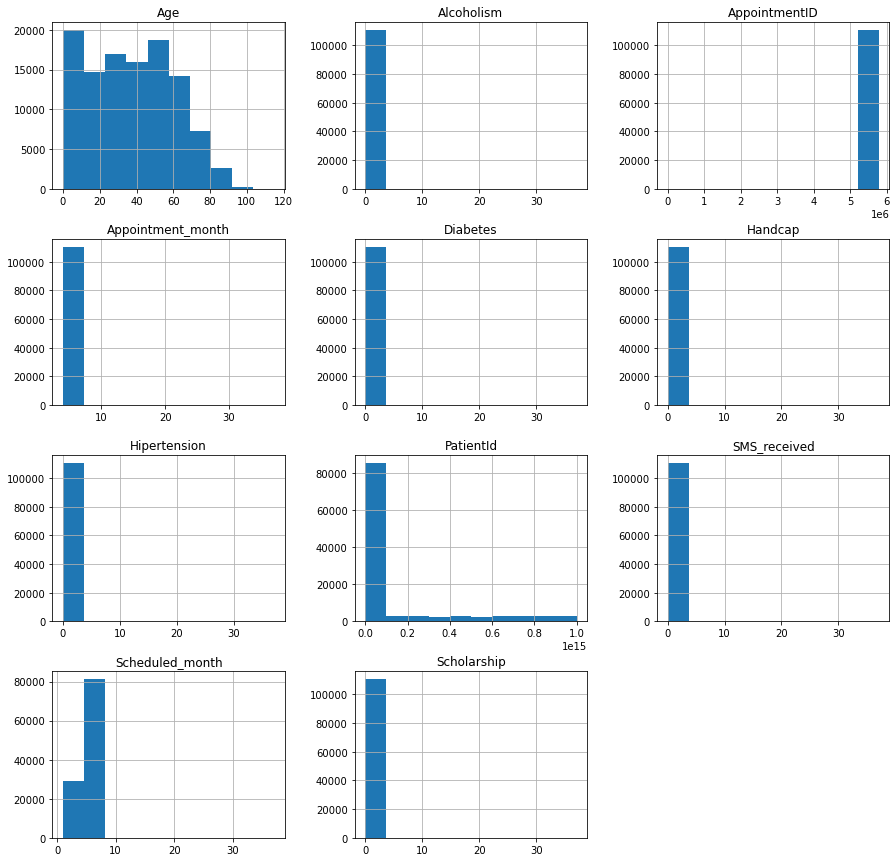

In [21]:
# explore data look at one variable 
df.hist(figsize=(15, 15));

In [22]:
df.Scheduled_Weekday.value_counts()

Tuesday              26168
Wednesday            24262
Monday               23084
Friday               18915
Thursday             18073
Saturday                24
37.08887421173107        1
Name: Scheduled_Weekday, dtype: int64

In [23]:
df.Appointment_month.value_counts()

5.000000     80841
6.000000     26450
4.000000      3235
37.088874        1
Name: Appointment_month, dtype: int64

In [24]:
df.Appointment_Weekday.value_counts()

Wednesday            25867
Tuesday              25640
Monday               22714
Friday               19019
Thursday             17247
Saturday                39
37.08887421173107        1
Name: Appointment_Weekday, dtype: int64

In [25]:
df.Appointment_Weekday.mode()

0    Wednesday
dtype: object

### Research Question 2  Investigate what factors affecting showing up 

In [26]:
#convert No-show to numeric to facilitate visualization 
df['No-show'] = df['No-show'].map({'Yes':1, 'No':0})

In [27]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_Date,Appointment_Date,Scheduled_month,Scheduled_Weekday,Appointment_month,Appointment_Weekday
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,4.0,Friday,4.0,Friday
1,5.589978e+14,5642503.0,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,4.0,Friday,4.0,Friday
2,4.262962e+12,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,4.0,Friday,4.0,Friday
3,8.679512e+11,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,4.0,Friday,4.0,Friday
4,8.841186e+12,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,4.0,Friday,4.0,Friday


#### create new two dataframe for 0(not showing ) and 1(showing)

In [28]:
df_yes=df[df['No-show']==1]
df_no=df[df['No-show']==0]

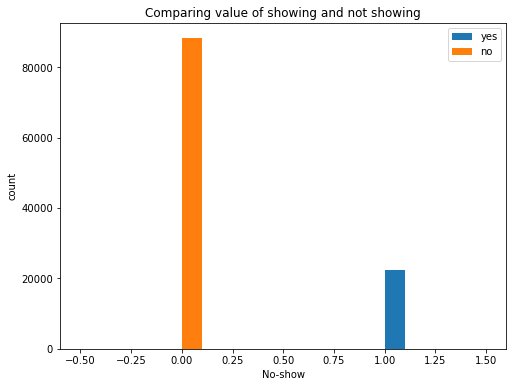

In [29]:
# Create just a figure and only one subplot
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(df_yes['No-show'],label='yes')
ax.hist(df_no['No-show'],label='no')
ax.set_title('Comparing value of showing and not showing')
ax.set_xlabel('No-show')
ax.set_ylabel('count')
ax.legend(loc='upper right')
plt.show()

In [30]:
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientId            22319 non-null  float64
 1   AppointmentID        22319 non-null  float64
 2   Gender               22319 non-null  object 
 3   ScheduledDay         22319 non-null  object 
 4   AppointmentDay       22319 non-null  object 
 5   Age                  22319 non-null  float64
 6   Neighbourhood        22319 non-null  object 
 7   Scholarship          22319 non-null  float64
 8   Hipertension         22319 non-null  float64
 9   Diabetes             22319 non-null  float64
 10  Alcoholism           22319 non-null  float64
 11  Handcap              22319 non-null  float64
 12  SMS_received         22319 non-null  float64
 13  No-show              22319 non-null  float64
 14  Scheduled_Date       22319 non-null  object 
 15  Appointment_Date     22319 non-null

In [31]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88207 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientId            88207 non-null  float64
 1   AppointmentID        88207 non-null  float64
 2   Gender               88207 non-null  object 
 3   ScheduledDay         88207 non-null  object 
 4   AppointmentDay       88207 non-null  object 
 5   Age                  88207 non-null  float64
 6   Neighbourhood        88207 non-null  object 
 7   Scholarship          88207 non-null  float64
 8   Hipertension         88207 non-null  float64
 9   Diabetes             88207 non-null  float64
 10  Alcoholism           88207 non-null  float64
 11  Handcap              88207 non-null  float64
 12  SMS_received         88207 non-null  float64
 13  No-show              88207 non-null  float64
 14  Scheduled_Date       88207 non-null  object 
 15  Appointment_Date     88207 non-null

In [32]:
df_yes['Neighbourhood'].mode()

0    JARDIM CAMBURI
dtype: object

In [33]:
df_no['Neighbourhood'].mode()

0    JARDIM CAMBURI
dtype: object

In [34]:
df_yes['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [35]:
df_no['Gender'].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

In [36]:
df_yes['Age'].value_counts()

0.0      639
1.0      415
17.0     396
19.0     394
30.0     369
        ... 
95.0       6
115.0      3
97.0       2
98.0       1
96.0       1
Name: Age, Length: 100, dtype: int64

In [37]:
df_no['Age'].value_counts()

0.0      2900
1.0      1858
52.0     1449
56.0     1372
2.0      1366
         ... 
98.0        5
100.0       4
115.0       2
102.0       2
99.0        1
Name: Age, Length: 103, dtype: int64

In [38]:
df_no['Age'].mode()

0    0.0
dtype: float64

In [39]:
df_yes['Scholarship'].value_counts()

0.0    19741
1.0     2578
Name: Scholarship, dtype: int64

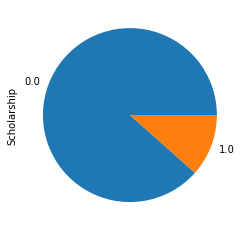

In [40]:
df_yes['Scholarship'].value_counts().plot(kind='pie')

In [41]:
df_no['Scholarship'].value_counts()

0.0    79924
1.0     8283
Name: Scholarship, dtype: int64

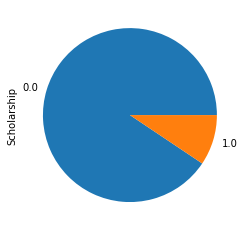

In [42]:
df_no['Scholarship'].value_counts().plot(kind='pie')

In [43]:
df_yes['Hipertension'].value_counts()

0.0    18547
1.0     3772
Name: Hipertension, dtype: int64

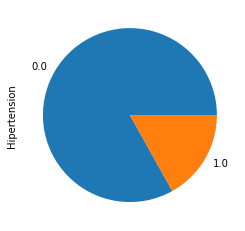

In [44]:
df_yes['Hipertension'].value_counts().plot(kind='pie')

In [45]:
df_no['Hipertension'].value_counts()

0.0    70178
1.0    18029
Name: Hipertension, dtype: int64

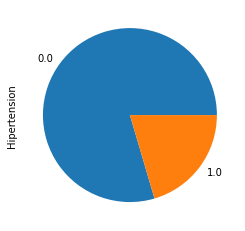

In [46]:
df_no['Hipertension'].value_counts().plot(kind='pie')

In [47]:
df_yes['Diabetes'].value_counts()

0.0    20889
1.0     1430
Name: Diabetes, dtype: int64

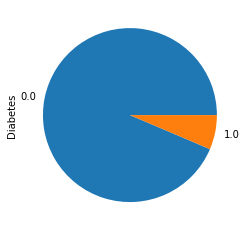

In [48]:
df_yes['Diabetes'].value_counts().plot(kind='pie')

In [49]:
df_no['Diabetes'].value_counts()

0.0    81694
1.0     6513
Name: Diabetes, dtype: int64

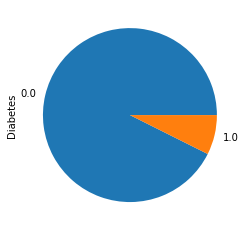

In [50]:
df_no['Diabetes'].value_counts().plot(kind='pie')

In [51]:
df_yes['Alcoholism'].value_counts()

0.0    21642
1.0      677
Name: Alcoholism, dtype: int64

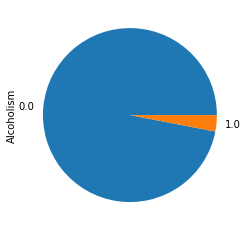

In [52]:
df_yes['Alcoholism'].value_counts().plot(kind='pie')

In [53]:
df_no['Alcoholism'].value_counts()

0.0    85524
1.0     2683
Name: Alcoholism, dtype: int64

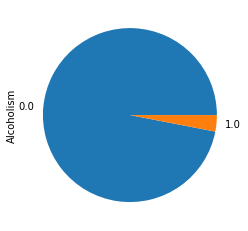

In [54]:
df_no['Alcoholism'].value_counts().plot(kind='pie')

In [55]:
df_yes['Handcap'].value_counts()

0.0    21912
1.0      366
2.0       37
3.0        3
4.0        1
Name: Handcap, dtype: int64

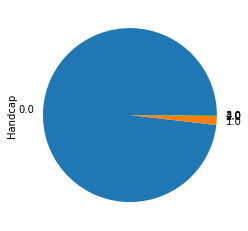

In [56]:
df_yes['Handcap'].value_counts().plot(kind='pie')

In [57]:
df_no['Handcap'].value_counts()

0.0    86373
1.0     1676
2.0      146
3.0       10
4.0        2
Name: Handcap, dtype: int64

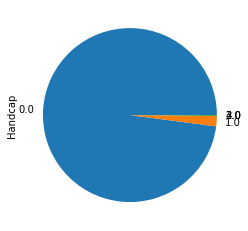

In [58]:
df_no['Handcap'].value_counts().plot(kind='pie')

In [59]:
df_yes['SMS_received'].value_counts()

0.0    12535
1.0     9784
Name: SMS_received, dtype: int64

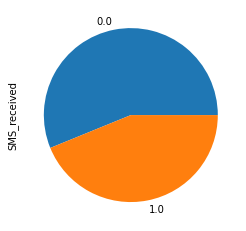

In [60]:
df_yes['SMS_received'].value_counts().plot(kind='pie')

In [61]:
df_no['SMS_received'].value_counts()

0.0    62509
1.0    25698
Name: SMS_received, dtype: int64

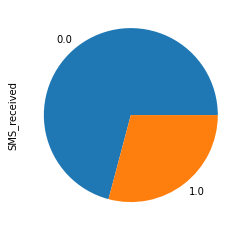

In [62]:
df_no['SMS_received'].value_counts().plot(kind='pie')

In [63]:
df_yes['Scheduled_month'].mode()

0    5.0
dtype: float64

In [64]:
df_no['Scheduled_month'].mode()

0    5.0
dtype: float64

In [65]:
df_yes['Scheduled_Weekday'].mode()

0    Tuesday
dtype: object

In [66]:
df_no['Scheduled_Weekday'].mode()

0    Tuesday
dtype: object

In [67]:
df_yes['Appointment_month'].mode()

0    5.0
dtype: float64

In [68]:
df_no['Appointment_month'].mode()

0    5.0
dtype: float64

In [69]:
df_yes['Appointment_Weekday'].mode()

0    Tuesday
dtype: object

In [70]:
df_no['Appointment_Weekday'].mode()

0    Wednesday
dtype: object

<a id='conclusions'></a>
## Conclusions

### First question investigate whole data to get full overview on which factors are important and which are not 
1. Data consists of 110527 record and 14 coloums .
2. PatientId','AppointmentID'where removed as they has no relation if the patient will show up or not .
3. Unique value in each column:
  * Gender :                2
  * ScheduledDay:      103549
  * AppointmentDay:        27
  * Age:                  104
  * Neighbourhood:         81
  * Scholarship:            2
  * Hipertension:           2
  * Diabetes:               2
  * Alcoholism:             2
  * Handcap:               5
  * SMS_received:          2
  * No-show :               2


### Second question investigate what factors affecting showing up 
 * Factors not affecting:              
    ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,gender
 * Factors affecting showing up:
    Appointment_Weekday(day of will where appointment set)
    *Tuesday mostly showing on Tuesday
    *patient mostly not showing on Wednesday

In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295